# Clasificador de Religión de Paises

- Enrique Barón Gómez

  <br>

  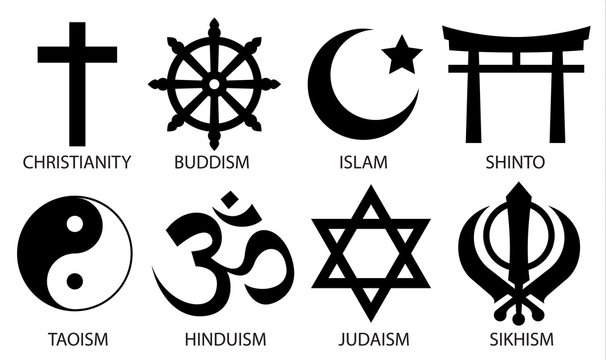

  <br>

- El objetivo de este proyecto consiste en clasificar correctamente la religión de un país dada su ubicación y zona geográfica, su área en kilometros cuadrados, su poblacion en millones de personas, su idioma y las características de su bandera como lo son su color y las formas que en ella aparecen.

  - Los datos fueron obtenidos del repositorio de Machine Learning de la Universidad de California Irvine ⟶ https://archive.ics.uci.edu/dataset/40/flags

  - Se va a realizar estadística descriptiva en los predictores para conocer sus medidas de tendencia central y encontrar si hay outliers

  - Se va a realizar una selección de los predictores que mas influyen para clasificar correctamente la religión de un país por medio de un árbol

  - Se van a utilizar Pipelines para Transformar los Datos y un Ensemble de varios modelos de clasificación para poder determinar el mejor modelo

In [ ]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# estilo plots
sns.set()

In [ ]:
# cargar datos
df_paises = pd.read_csv('https://raw.githubusercontent.com/Kike1027/ML_II_Project/main/Flags.csv')

df_paises

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [ ]:
# mirar si hay datos nulos
df_paises.isna().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## $Y$ ⟶ Output

- Nuestra variable $Y$ es **religion** la cual se encuentra categorizada de la siguiente manera:

  - $0 ⟶$ Católica
  - $1 ⟶$ Otra Cristiana (Ortodoxa, Protestante, Anglicana)
  - $2 ⟶$ Musulmana
  - $3 ⟶$ Budista
  - $4 ⟶$ Hinduista
  - $5 ⟶$ Étnica
  - $6 ⟶$ Marxista
  - $7 ⟶$ Otra


In [ ]:
# cantidad de observaciones por tipo de religión
num_religiones = df_paises.iloc[:, 6].value_counts().reset_index()

# renombrar columnas
num_religiones.rename(columns={'index': 'religión',
                               'religion': 'num_paises'}, inplace=True)

# diccionario con religiones
reli_dict = {0: 'Católica',
             1: 'Otra Cristiana',
             2: 'Musulmana',
             3: 'Budista',
             4: 'Hinduista',
             5: 'Etnica',
             6: 'Marxista',
             7: 'Otra'}

# reemplazar valores
num_religiones.replace({'religión': reli_dict}, inplace=True)

# crear col %
num_religiones['%'] = (num_religiones.num_paises / len(df_paises)) * 100

num_religiones

,religión,num_paises,%
0,Otra Cristiana,60,30.927835
1,Católica,40,20.618557
2,Musulmana,36,18.556701
3,Etnica,27,13.917526
4,Marxista,15,7.731959
5,Budista,8,4.123711
6,Hinduista,4,2.061856
7,Otra,4,2.061856


- Como se puede apreciar, la religión Otra Cristiana (30.92% de países), Católica (20.61% de países) y Musulmana (18.55% de los países) conforman el 70.08% de los 194 países analizados

  - El restante 29.92% de los países tienen religiones Étnicas, Marxistas, Budistas, Hinduistas u otras. Debido a esto estas religiones van a ser mapeadas a la categoria Otra

In [ ]:
# map religiones > 2 to 7 (Otra)
df_paises['religion'] = np.where(df_paises.religion > 2, 3, df_paises.religion)

# mirar cambios
num_religiones = df_paises.iloc[:, 6].value_counts().reset_index()

# renombrar columnas
num_religiones.rename(columns={'index': 'religión',
                               'religion': 'num_paises'}, inplace=True)

# diccionario con religiones
reli_dict = {0: 'Católica',
             1: 'Otra Cristiana',
             2: 'Musulmana',
             3: 'Otra'}

# reemplazar valores
num_religiones.replace({'religión': reli_dict}, inplace=True)

# crear col %
num_religiones['%'] = (num_religiones.num_paises / len(df_paises)) * 100

num_religiones

,religión,num_paises,%
0,Otra Cristiana,60,30.927835
1,Otra,58,29.896907
2,Católica,40,20.618557
3,Musulmana,36,18.556701


- Como se puede ver, después de haber realizado el mapeo de las religiones con menor representación la categoria Otra corresponde al 29.89% de los países analizados

  - Esto nos permite evitar problemas de desbalanceo de clases durante el modelado

In [ ]:
# Y
Y = df_paises['religion']

Y

0      2
1      3
2      2
3      1
4      0
      ..
189    1
190    3
191    3
192    3
193    3
Name: religion, Length: 194, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## $X ⟶$ Features

- A continuación se muestran las variables predictoras del set de datos:

  - landmass ⟶ Continente donde se encuentra ubicado el país

    - 1 ⟶ Norte América
    - 2 ⟶ Sur América
    - 3 ⟶ Europa
    - 4 ⟶ Africa
    - 5 ⟶ Asia
    - 6 ⟶ Oceania

  - zone ⟶ Cuadrante geográfico basado en Greenwich y el Ecuador

    - 1 ⟶ NE
    - 2 ⟶ SE
    - 3 ⟶ SW
    - 4 ⟶ NW

  - area ⟶ Área en miles de kilometros
  - population ⟶ Población redondeada a millones
  - language ⟶ Idioma del país

    - 1 ⟶ Ingles
    - 2 ⟶ Español
    - 3 ⟶ Frances
    - 4 ⟶ Aleman
    - 5 ⟶ Eslávico
    - 6 ⟶ Otro Indio Europeo
    - 7 ⟶ Chino
    - 8 ⟶ Arábico

  - bars ⟶ Número de barras verticales en la bandera
  - stripes ⟶ Número de barras horizontales en la bandera
  - colours ⟶ Número de colores diferentes en la bandera
  - red ⟶ 0 si la bandera no tiene rojo si no 1  
  - green ⟶ 0 si la bandera no tiene verde si no 1
  - blue ⟶ 0 si la bandera no tiene azul si no 1
  - gold ⟶ 0 si la bandera no tiene amarillo si no 1
  - white ⟶ 0 si la bandera no tiene blanco si no 1
  - black ⟶ 0 si la bandera no tiene negro si no 1
  - orange ⟶ 0 si la bandera no tiene naranja si no 1
  - mainhue ⟶ Color predominante en la bandera
  - circles ⟶ Número de circulos en la bandera
  - crosses ⟶ Número de cruces en la bandera
  - saltires ⟶ Número de cruces diagonales en la bandera
  - quarters ⟶ Número de secciones en la bandera
  - sunstars ⟶ Número de soles o estrellas en la bandera
  - crescent ⟶ 0 si la bandera no tiene una luna si no 1
  - triangle ⟶ 0 si la bandera no tiene un triangulo si no 1
  - icon ⟶ 0 si la bandera no tiene un objeto inanimado (ej: barco) si no 1
  - animate ⟶ 0 si la bandera no tiene un objeto animado (animal, planta o humano) si no 1
  - text ⟶ 0 si la bandera no tiene texto si no 1
  - topleft ⟶ color en la punta superior izquierda de la bandera
  - botright ⟶ color en la punta inferior derecha de la bandera

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Variables Númericas

- Análisis descriptivo a las variables númericas para conocer sus distribuciones y detectar datos atípicos

In [ ]:
# col númericas
numeric_cols = ['area', 'population', 'bars', 'stripes', 'colours', 'circles',
                'crosses', 'saltires', 'quarters', 'sunstars']

# df numerico
df_numeric = df_paises[numeric_cols]

df_numeric

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,648,16,0,3,5,0,0,0,0,1
1,29,3,0,0,3,0,0,0,0,1
2,2388,20,2,0,3,0,0,0,0,1
3,0,0,0,0,5,0,0,0,0,0
4,0,0,3,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
189,3,0,0,0,3,0,0,0,1,5
190,256,22,0,3,4,0,0,0,0,1
191,905,28,0,0,4,1,0,0,0,0
192,753,6,3,0,4,0,0,0,0,0


In [ ]:
# estadisticas descriptivas
df_numeric.describe()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


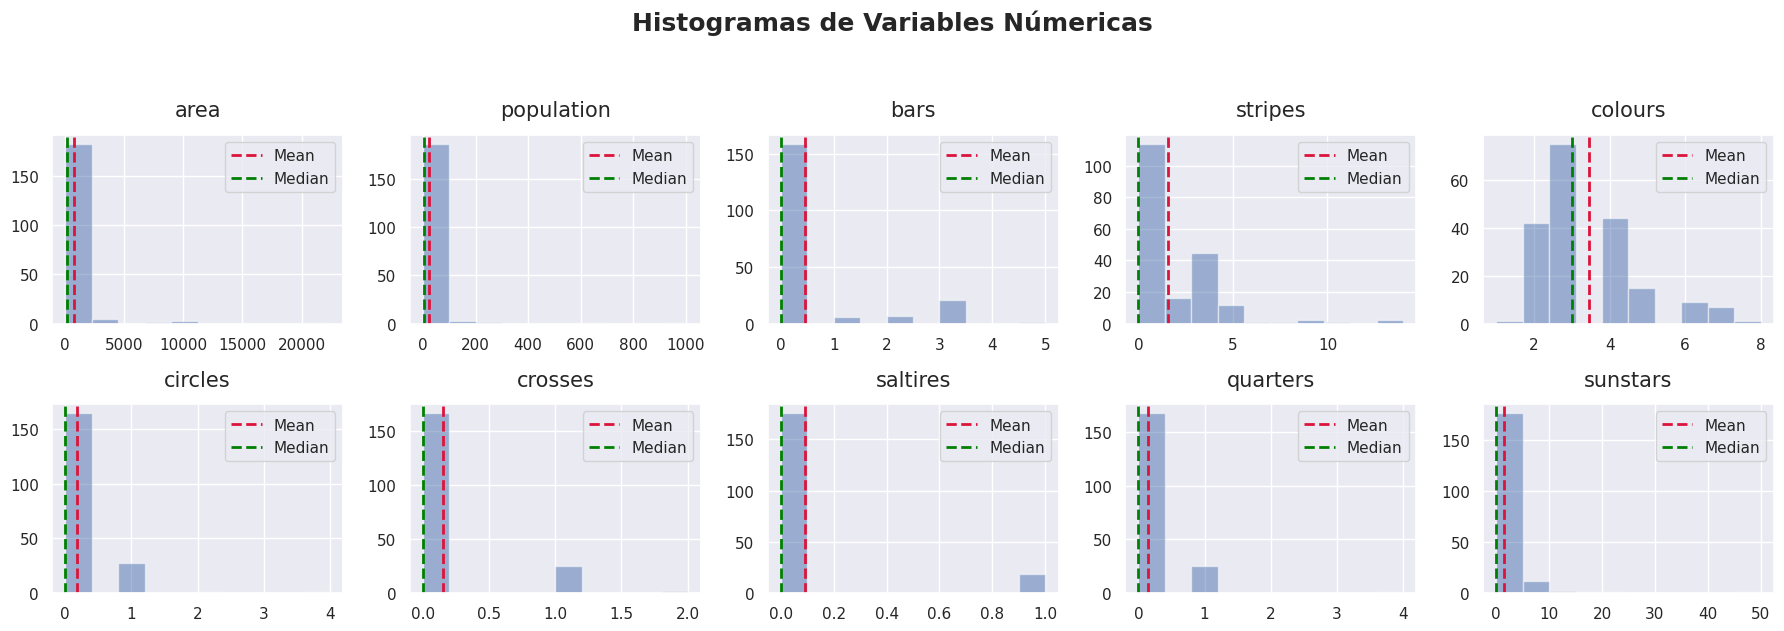

In [ ]:
# distribuciones
fig, axs = plt.subplots(2, 5, figsize=(18, 6))

for (i, axs) in enumerate(axs.flatten()):

  # histograma
  axs.hist(df_numeric.iloc[:, i], alpha=0.5)
  # mean
  axs.axvline(x=np.mean(df_numeric.iloc[:, i]), ls='dashed', lw=2, label='Mean', color='crimson')
  # median
  axs.axvline(x=np.median(df_numeric.iloc[:, i]), ls='dashed', lw=2, label='Median', color='green')

  axs.legend()
  axs.set_title(numeric_cols[i], pad=13, size=15)

plt.suptitle('Histogramas de Variables Númericas', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

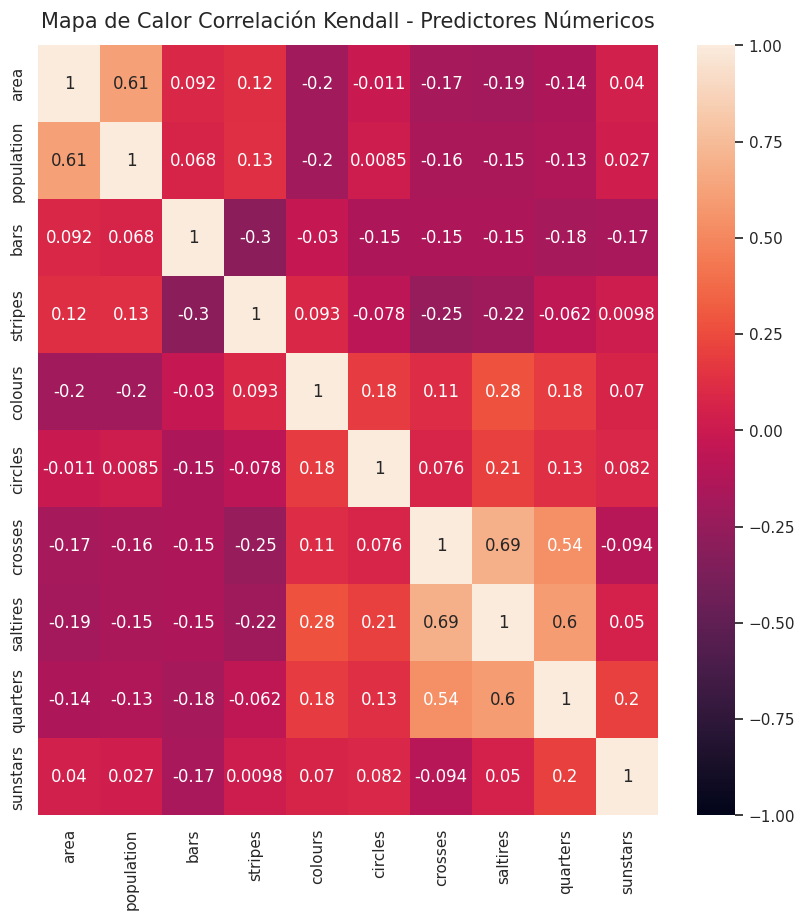

In [ ]:
# mapa de calor de correlaciones >> kendall
fig, axs = plt.subplots(figsize=(10, 10))

sns.heatmap(df_numeric.corr(method='kendall'), vmin=-1, vmax=1, annot=True)

plt.title('Mapa de Calor Correlación Kendall - Predictores Númericos', pad=13, size=15)

plt.show()

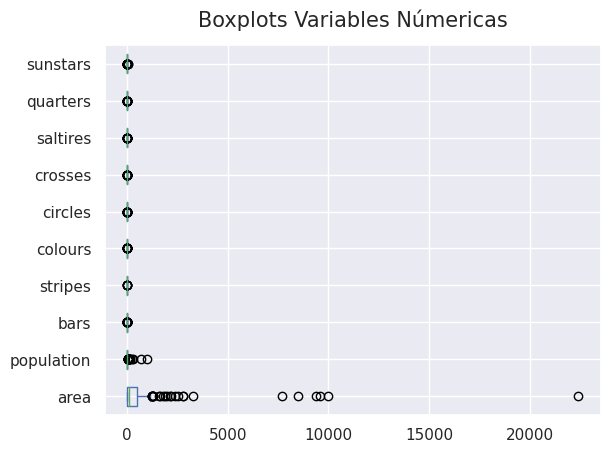

In [ ]:
# boxplot
df_numeric.plot(kind ='box', vert=False)


plt.title('Boxplots Variables Númericas', pad=13, size=15)
plt.show()

- Como se puede apreciar tanto en los Boxplots como en los Histogramas de las variables númericas, estas se encuentran en direntes escalas.

  - Se va a utilizar el MinMaxScaler() para Normalizarlas en un rango de $[0, 1]$

  - Se evidencia a su vez, que hay datos atípicos en las variables de *area* y *population*, se va a utilizar un Transformador para minimizar su impacto

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Variables Categóricas

In [ ]:
# col categoricas
categoric_cols = ['landmass', 'zone', 'language', 'red', 'green', 'blue', 'gold',
                  'white', 'black', 'orange', 'mainhue', 'crescent', 'triangle',
                  'icon', 'animate', 'text', 'topleft', 'botright']

# df categorico
df_categoric = df_paises[categoric_cols]

df_categoric

,landmass,zone,language,red,green,blue,gold,white,black,orange,mainhue,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,10,1,1,0,1,1,1,0,green,0,0,1,0,0,black,green
1,3,1,6,1,0,0,1,0,1,0,red,0,0,0,1,0,red,red
2,4,1,8,1,1,0,0,1,0,0,green,1,0,0,0,0,green,white
3,6,3,1,1,0,1,1,1,0,1,blue,0,1,1,1,0,blue,red
4,3,1,6,1,0,1,1,0,0,0,gold,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,6,3,1,1,0,1,0,1,0,0,red,0,0,0,0,0,blue,red
190,3,1,6,1,0,1,1,1,0,0,red,0,0,0,0,0,blue,red
191,4,2,10,1,1,0,1,0,0,1,green,0,0,1,1,0,green,green
192,4,2,10,1,1,0,0,0,1,1,green,0,0,0,1,0,green,brown


In [ ]:
# estadistica descriptiva
df_categoric.describe()

,landmass,zone,language,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,5.340206,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,3.496517,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


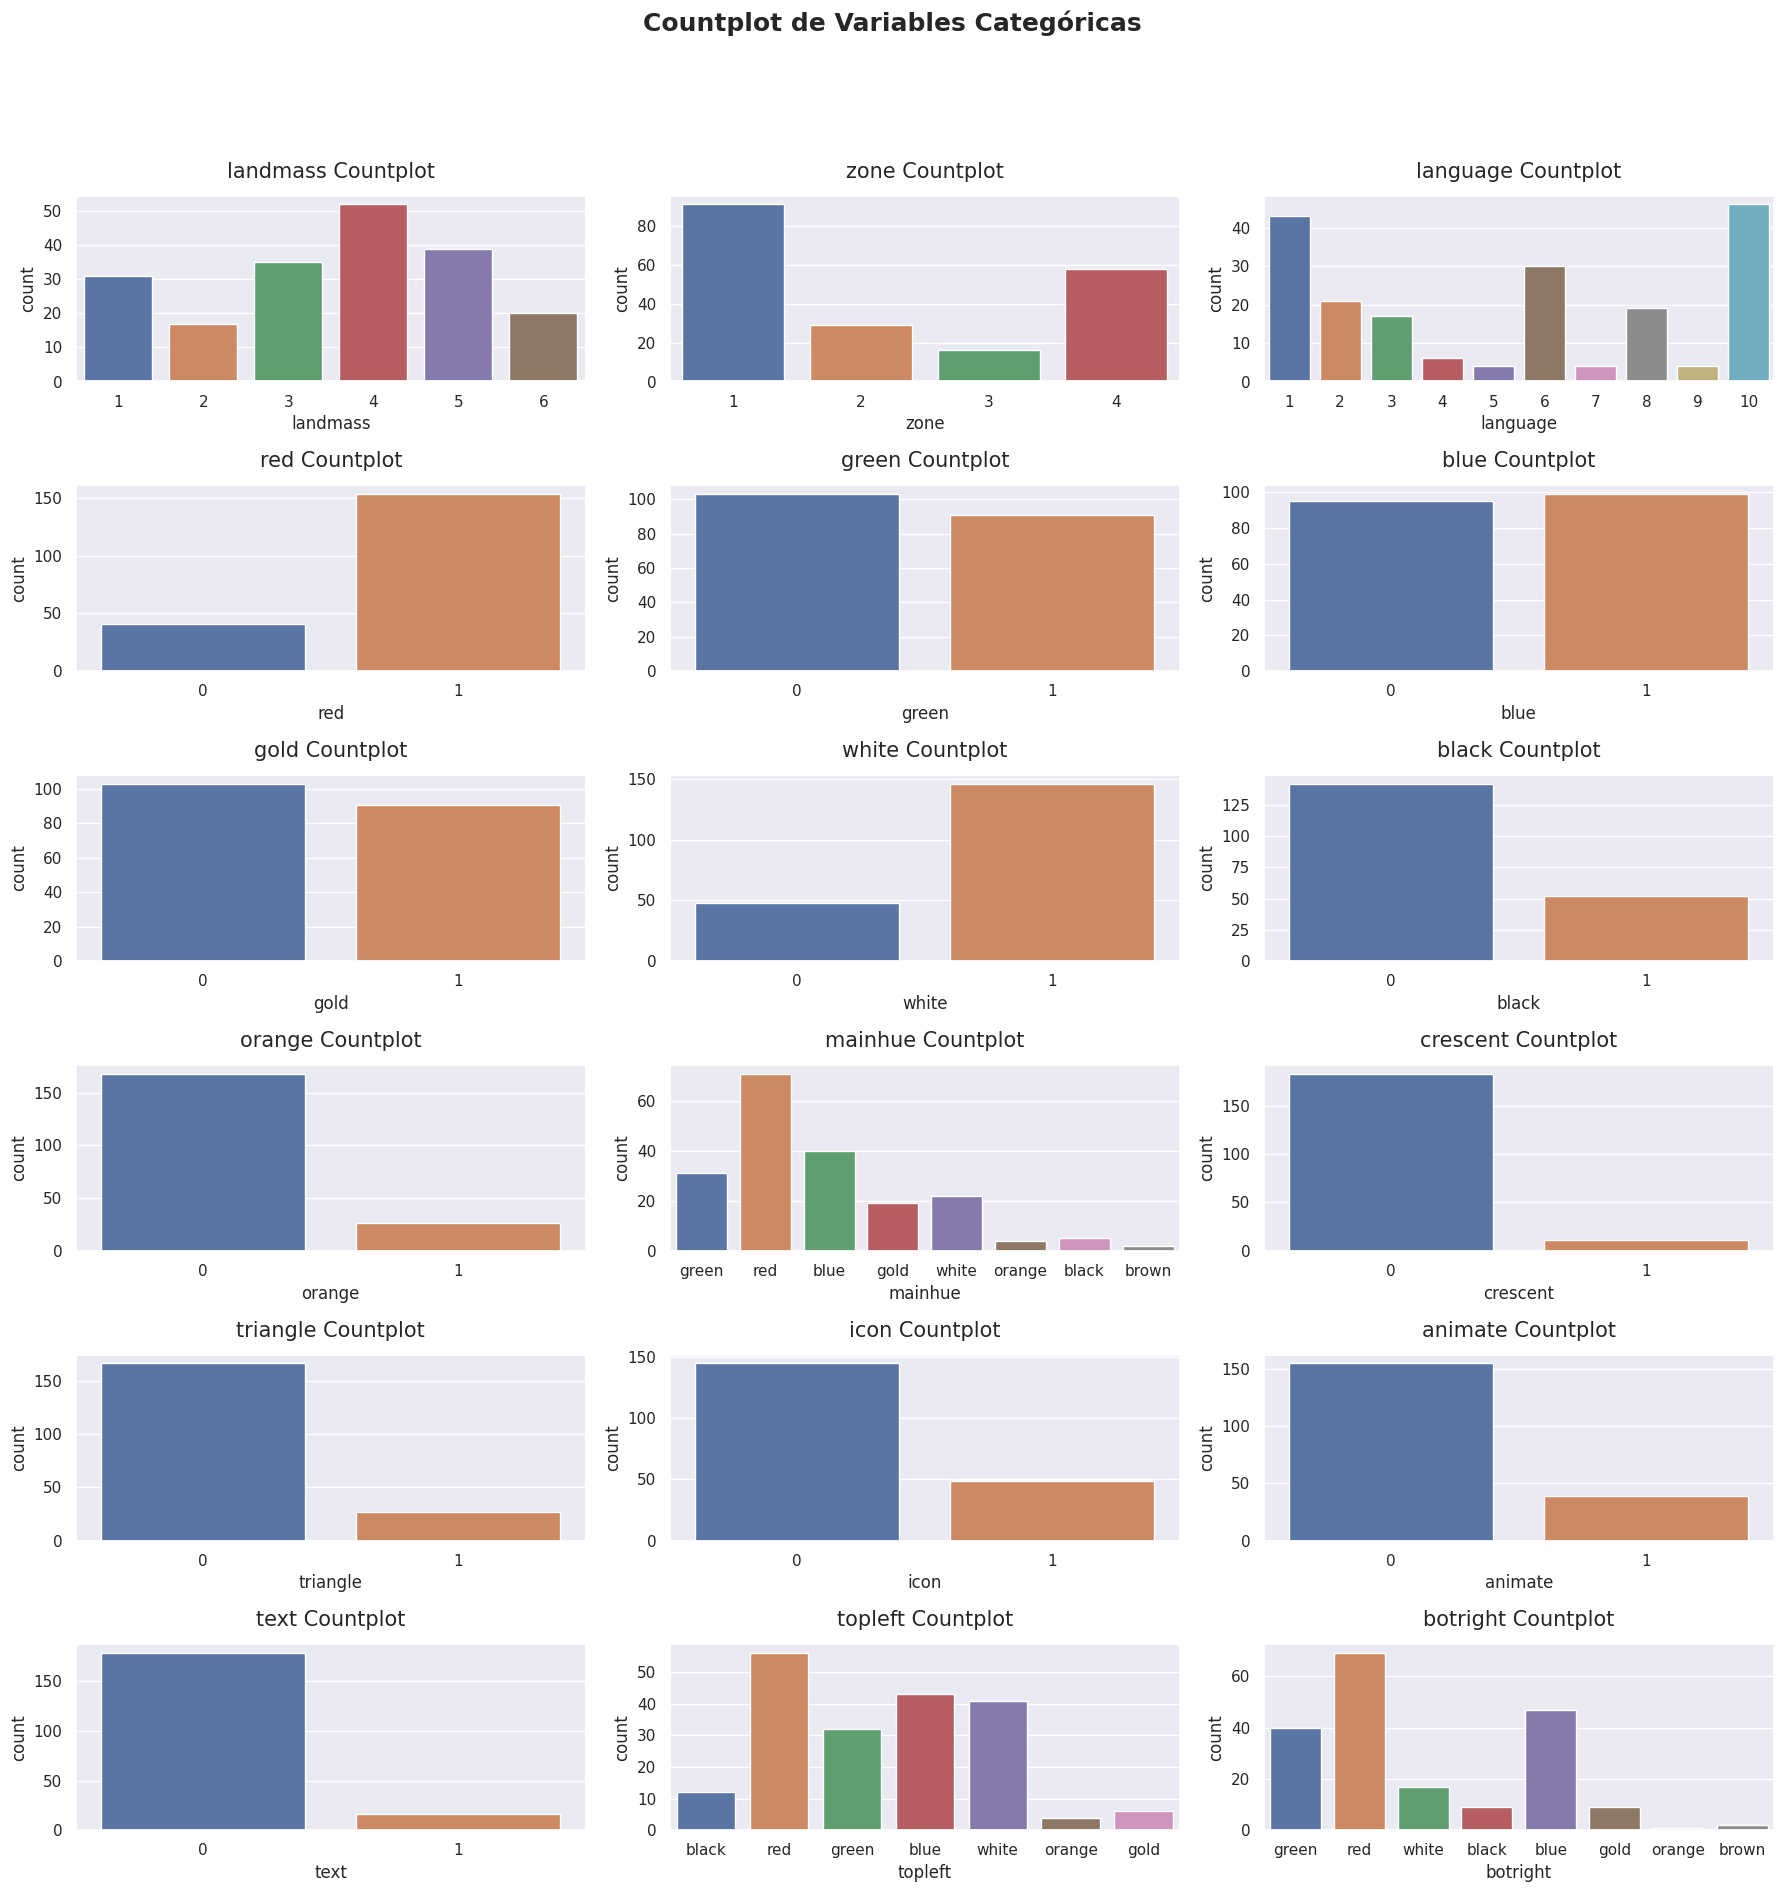

In [ ]:
# countplots
fig, axs = plt.subplots(6, 3, figsize=(18, 18))

for i in range(0, 18):

  # countplot
  ax = plt.subplot(6, 3, i+1)
  ax = sns.countplot(x=categoric_cols[i], data=df_categoric)
  ax.set_title(f'{categoric_cols[i]} Countplot', pad=13, size=15)

plt.suptitle('Countplot de Variables Categóricas', fontweight='bold', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

- Como se puede apreciar la mayoria de las variables estan dicotomizadas a valores de 0 y 1

  - Las variables como *mainhue, topleft, botright* deben ser transformadas con un One Hot Encoding en el caso de ser seleccionadas para ser utilizadas en modelos diferente a árboles de decisión

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## Árbol de Decisión ⟶ Selección de Predictores Importantes

- Se va a utilizar un Árbol de Decisión para poder determinar cuales de las 28 predictores son las mas importantes para clasificar la religión de un país

  - Debido a que los Árboles de Decisión aceptan variables categóricas no es necesario realizarles One Hot Encoding

  - Las variables númericas van a ser Normalizadas utilizando MinMaxScaler y se les va aplicar un Transformador (Winsorizer) para el manejo de datos atípicos


In [ ]:
# instalar feature_engine
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
# importar modulos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

# manejo de outliers
from feature_engine.outliers import Winsorizer

# One Hot Encoding
from feature_engine.encoding import OneHotEncoder as OneHot_feature


In [ ]:
# X >> variables predictoras numericas + categoricas
X = pd.concat([df_numeric, df_categoric], axis=1)

# mirar dimensiones de X y Y
print(f'X dimension: {X.shape}')
print(f'Y dimension: {Y.shape}')

X dimension: (194, 28)
Y dimension: (194,)


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# dimensiones Train Set
print(f'x_train dimension: {x_train.shape}')
print(f'y_train dimension: {y_train.shape}', '\n')

# dimensiones Test Set
print(f'x_test dimension: {x_train.shape}')
print(f'y_test dimension: {y_train.shape}', '\n')

x_train dimension: (155, 28)
y_train dimension: (155,) 

x_test dimension: (155, 28)
y_test dimension: (155,) 



In [ ]:
# train data
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,orange,mainhue,crescent,triangle,icon,animate,text,topleft,botright,religion
53,28,0,0,3,4,0,0,0,0,0,...,0,green,0,1,0,0,0,green,red,3
149,72,3,0,3,3,0,0,0,0,0,...,0,green,0,0,0,0,0,green,blue,3
72,109,8,3,0,2,0,0,0,0,0,...,0,blue,0,0,0,0,0,blue,blue,0
152,637,5,0,0,2,0,0,0,0,1,...,0,blue,0,0,0,0,0,blue,blue,2
42,51,2,0,5,3,0,0,0,0,0,...,0,blue,0,0,0,0,0,blue,blue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,23,0,0,2,8,1,0,0,0,0,...,1,blue,0,0,1,1,1,red,red,1
98,30,1,2,0,4,0,0,0,0,0,...,0,blue,0,0,1,0,0,green,blue,3
66,239,14,0,3,4,0,0,0,0,1,...,0,red,0,0,0,0,0,red,green,3
126,925,56,3,0,2,0,0,0,0,0,...,0,green,0,0,0,0,0,green,green,2


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Test Transformaciones

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### Test Transformaciones Númericas

In [ ]:
# min max scaler
min_max = MinMaxScaler()

# entrenar y transformar x_train numerico
x_train_num1 = min_max.fit_transform(x_train[numeric_cols])

df_trans1 = pd.DataFrame(x_train_num1, columns=numeric_cols)
df_trans1

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,0.001250,0.000000,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.00
1,0.003214,0.010949,0.0,0.214286,0.166667,0.0,0.0,0.0,0.0,0.00
2,0.004866,0.029197,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
3,0.028435,0.018248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02
4,0.002277,0.007299,0.0,0.357143,0.166667,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
150,0.001027,0.000000,0.0,0.142857,1.000000,0.5,0.0,0.0,0.0,0.00
151,0.001339,0.003650,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.00
152,0.010669,0.051095,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.02
153,0.041291,0.204380,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


In [ ]:
# estadisticas descriptivas
df_trans1.describe()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.026144,0.054250,0.087742,0.120276,0.255914,0.070968,0.061290,0.083871,0.035484,0.026323
std,0.092092,0.124898,0.206497,0.177362,0.218447,0.184098,0.183185,0.278093,0.111944,0.087735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000469,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.005133,0.014599,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.020311,0.052920,0.000000,0.214286,0.333333,0.000000,0.000000,0.000000,0.000000,0.020000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Como se puede ver, después de haber aplicado el MinMaxScaler a las variables númericas estas fueron transformadas a un Rango de $[0, 1]$

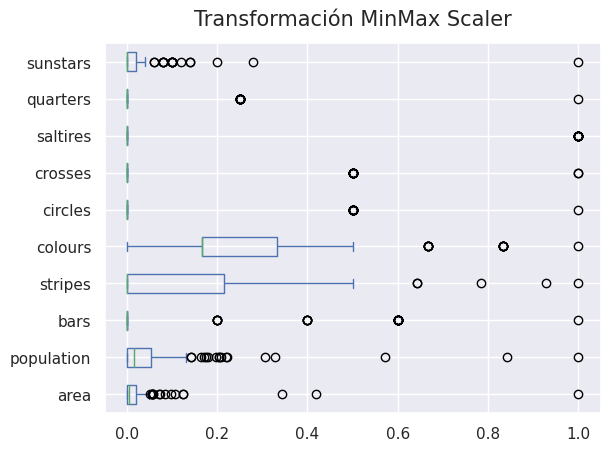

In [ ]:
# boxplot
df_trans1.plot(kind='box', vert=False)

plt.title('Transformación MinMax Scaler', pad=13, size=15)
plt.show()

- Se evidencia que hay una gran cantidad de outliers en las variables *sunstars, population y area*

  - Se utiliza el Transformador Winsorizer con *quantiles* y un *fold=0.05* para que los límities sean el $5^{to}$ y el $95^{avo}$ precentil

In [ ]:
# winsorizer >> manejo de outliers con IQR
winso = Winsorizer(capping_method='quantiles')

winso

Winsorizer(capping_method='quantiles', fold=0.05)

In [ ]:
# entrenar y transformar df_trans1
trans_2 = winso.fit_transform(df_trans1)

trans_2

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,0.001250,0.000000,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.00
1,0.003214,0.010949,0.0,0.214286,0.166667,0.0,0.0,0.0,0.0,0.00
2,0.004866,0.029197,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
3,0.028435,0.018248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02
4,0.002277,0.007299,0.0,0.357143,0.166667,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
150,0.001027,0.000000,0.0,0.142857,0.716667,0.5,0.0,0.0,0.0,0.00
151,0.001339,0.003650,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.00
152,0.010669,0.051095,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.02
153,0.041291,0.204380,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


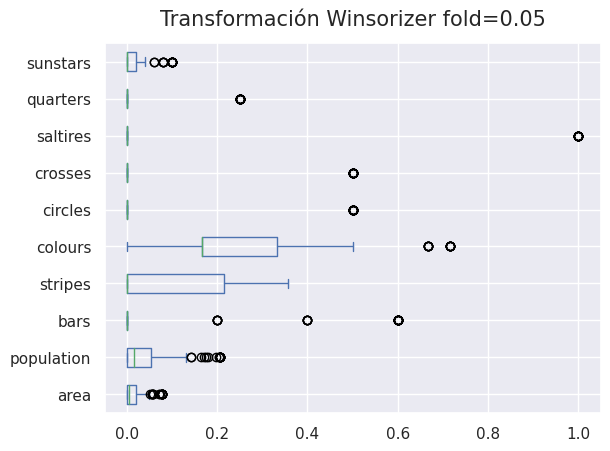

In [ ]:
# boxplot
trans_2.plot(kind='box', vert=False)

plt.title('Transformación Winsorizer fold=0.05', pad=13, size=15)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### Test OneHot Categóricas No Dicotomizadas

- Se va aplicar una transformación One Hot Encoder a las variables *mainhue, topleft y botright*

In [ ]:
# paises por mainhue
paises_mainhue = train_data['mainhue'].value_counts().reset_index()

# renombrar cols
paises_mainhue.rename(columns={'index': 'mainhue',
                               'mainhue': 'num_paises'}, inplace=True)

paises_mainhue

,mainhue,num_paises
0,red,55
1,blue,34
2,green,24
3,white,18
4,gold,16
5,black,5
6,orange,2
7,brown,1


In [ ]:
# paises por topleft
paises_topleft = train_data['topleft'].value_counts().reset_index()

# renombrar cols
paises_topleft.rename(columns={'index': 'topleft',
                               'topleft': 'num_paises'}, inplace=True)

paises_topleft

,topleft,num_paises
0,red,43
1,blue,39
2,white,29
3,green,25
4,black,12
5,gold,5
6,orange,2


In [ ]:
# paises por botright
paises_botright = train_data['botright'].value_counts().reset_index()

# renombrar cols
paises_botright.rename(columns={'index': 'botright',
                                'botright': 'num_paises'}, inplace=True)

paises_botright

,botright,num_paises
0,red,52
1,blue,38
2,green,33
3,white,14
4,gold,9
5,black,7
6,orange,1
7,brown,1


In [ ]:
# crear OneHot_feature
hot = OneHot_feature(drop_last=True, ignore_format=True)

hot

OneHotEncoder(drop_last=True, ignore_format=True)

In [ ]:
# transformar columnas
trans_3 = hot.fit_transform(df_paises[['mainhue', 'topleft', 'botright']])

trans_3

,mainhue_green,mainhue_red,mainhue_blue,mainhue_gold,mainhue_white,mainhue_orange,mainhue_black,topleft_black,topleft_red,topleft_green,topleft_blue,topleft_white,topleft_orange,botright_green,botright_red,botright_white,botright_black,botright_blue,botright_gold,botright_orange
0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
190,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
191,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
192,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### Test x_train Transformado



In [ ]:
# cols que no van a ser transformadas
clean_cols = ['landmass', 'zone', 'language', 'red', 'green', 'blue', 'gold',
              'white', 'black', 'orange', 'crescent','triangle', 'icon',
              'animate', 'text']

# df con cols que no van a ser transformadas
paises_clean = df_paises[clean_cols]

paises_clean

,landmass,zone,language,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
0,5,1,10,1,1,0,1,1,1,0,0,0,1,0,0
1,3,1,6,1,0,0,1,0,1,0,0,0,0,1,0
2,4,1,8,1,1,0,0,1,0,0,1,0,0,0,0
3,6,3,1,1,0,1,1,1,0,1,0,1,1,1,0
4,3,1,6,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,6,3,1,1,0,1,0,1,0,0,0,0,0,0,0
190,3,1,6,1,0,1,1,1,0,0,0,0,0,0,0
191,4,2,10,1,1,0,1,0,0,1,0,0,1,1,0
192,4,2,10,1,1,0,0,0,1,1,0,0,0,1,0


In [ ]:
# left join numeric transformations + one hot transformations
df_x_train_Trans = trans_2.join(trans_3)

df_x_train_Trans

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_blue,topleft_white,topleft_orange,botright_green,botright_red,botright_white,botright_black,botright_blue,botright_gold,botright_orange
0,0.001250,0.000000,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,0
1,0.003214,0.010949,0.0,0.214286,0.166667,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
2,0.004866,0.029197,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
3,0.028435,0.018248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02,...,1,0,0,0,1,0,0,0,0,0
4,0.002277,0.007299,0.0,0.357143,0.166667,0.0,0.0,0.0,0.0,0.00,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.001027,0.000000,0.0,0.142857,0.716667,0.5,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
151,0.001339,0.003650,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.00,...,1,0,0,1,0,0,0,0,0,0
152,0.010669,0.051095,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.02,...,1,0,0,0,0,0,0,1,0,0
153,0.041291,0.204380,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# left join clean cols
df_x_train_Trans = df_x_train_Trans.join(paises_clean)

df_x_train_Trans

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
0,0.001250,0.000000,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.00,...,0,1,1,1,0,0,0,1,0,0
1,0.003214,0.010949,0.0,0.214286,0.166667,0.0,0.0,0.0,0.0,0.00,...,0,1,0,1,0,0,0,0,1,0
2,0.004866,0.029197,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,0,0,1,0,0,1,0,0,0,0
3,0.028435,0.018248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02,...,1,1,1,0,1,0,1,1,1,0
4,0.002277,0.007299,0.0,0.357143,0.166667,0.0,0.0,0.0,0.0,0.00,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.001027,0.000000,0.0,0.142857,0.716667,0.5,0.0,0.0,0.0,0.00,...,0,0,1,0,0,1,0,0,0,0
151,0.001339,0.003650,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.00,...,1,1,1,0,0,0,1,0,0,0
152,0.010669,0.051095,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.02,...,1,0,1,0,0,0,0,0,0,0
153,0.041291,0.204380,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,1,0,1,0,1,0,0,0,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### MinMaxScaler y Winsorizer en Pipeline

- Aplicar las transformaciones realizadas a las variables númericas de la sección anterior utilizando un pipeline

In [ ]:
# numeric transformer
numeric_trans = make_pipeline(MinMaxScaler(),
                              Winsorizer(capping_method='quantiles'))

numeric_trans

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('winsorizer',
                 Winsorizer(capping_method='quantiles', fold=0.05))])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### One Hot Encoder a Variables Categóricas No Dicotomizadas

- Se va aplicar una transformación One Hot Encoder a las variables *mainhue, topleft y botright*

In [ ]:
# columnas a realizar One Hot
OneHot_cols = ['mainhue', 'topleft', 'botright']


In [ ]:
# one hot transformer
onehot_trans = make_pipeline(OneHot_feature(drop_last=True, ignore_format=True))

onehot_trans

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop_last=True, ignore_format=True))])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Preprocesamiento de Pipeline

In [ ]:
# preprocesamiento >> numericos + OneHotCategoric + Encoded Cols
preprocessor = ColumnTransformer(
    transformers=[('numeric', numeric_trans, numeric_cols),
                  ('one_hot', onehot_trans, OneHot_cols)],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('winsorizer',
                                                  Winsorizer(capping_method='quantiles',
                                                             fold=0.05))]),
                                 ['area', 'population', 'bars', 'stripes',
                                  'colours', 'circles', 'crosses', 'saltires',
                                  'quarters', 'sunstars']),
                                ('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop_last=True,
                                                                ignore_format=True))]),
                                 ['mainhue', 'topleft', 'botright'])])

In [ ]:
# ver transformacion de X_train
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(x_train))

X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.001250,0.000000,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.003214,0.010949,0.0,0.214286,0.166667,0.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004866,0.029197,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.028435,0.018248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002277,0.007299,0.0,0.357143,0.166667,0.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.001027,0.000000,0.0,0.142857,0.716667,0.5,0.0,0.0,0.0,0.00,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
151,0.001339,0.003650,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.010669,0.051095,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.02,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.041291,0.204380,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Árbol de Decision

In [ ]:
# crear pipeline con DecisionTreeClassifier
model_Tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))

model_Tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05))]),
                                                  ['area', 'population', 'bars',
                                                   'stripes', 'colours',
                                                   'circles', 'crosses',
                                                   'saltires', 'quarters',
                                                   'sunstars']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop_last=True,
                                                                                 ignore_format=True))]),
                                                  ['mainhue', 'topleft',
                                                   'botright'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=123))])

In [ ]:
# get params keys of pipeline
model_Tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'decisiontreeclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__numeric', 'columntransformer__one_hot', 'columntransformer__numeric__memory', 'columntransformer__numeric__steps', 'columntransformer__numeric__verbose', 'columntransformer__numeric__minmaxscaler', 'columntransformer__numeric__winsorizer', 'columntransformer__numeric__minmaxscaler__clip', 'columntransformer__numeric__minmaxscaler__copy', 'columntransformer__numeric__minmaxscaler__feature_range', 'columntransformer__numeric__winsorizer__add_indicators', 'columntransformer__numeric__winsorizer__capping_method', 'columntransformer__numeric__winsorizer__fold', 'columntransformer__numeric__winsorizer__missing_values', 'columntransform

In [ ]:
# entrenar modelo
model_Tree.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05))]),
                                                  ['area', 'population', 'bars',
                                                   'stripes', 'colours',
                                                   'circles', 'crosses',
                                                   'saltires', 'quarters',
                                                   'sunstars']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop_last=True,
                                                                                 ignore_format=True))]),
                                                  ['mainhue', 'topleft',
                                                   'botright'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=123))])

In [ ]:
model_Tree['decisiontreeclassifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
model_Tree.score(x_test, y_test)

0.717948717948718

- El modelo construido con las transformaciones aplicadas a los predictores tiene un Accuracy de 0.7179.

  - Es decir que el modelo en promedio clasifica correctamente la religión de un país el 71.8% de las veces en datos nuevos

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Performance del Modelo

In [ ]:
# importar classification report
from sklearn.metrics import classification_report

In [ ]:
# predicciones
predi_Tree = model_Tree.predict(x_test)

predi_Tree

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 3, 2, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 3, 2, 0, 3, 0, 2, 2, 2, 0, 1, 0])

In [ ]:
# imprimir classification report
print('Classification Report - Clasificador de Religión de Países (Árbol de Decisión):', '\n')
print(classification_report(y_test, predi_Tree))

Classification Report - Clasificador de Religión de Países (Árbol de Decisión): 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.77      0.77      0.77        13
           2       0.64      1.00      0.78         7
           3       0.67      0.44      0.53         9

    accuracy                           0.72        39
   macro avg       0.71      0.73      0.70        39
weighted avg       0.72      0.72      0.71        39



- Como podemos observar el Clasificador de Religión de Países (Árbol de Decisión) tiene un buen desempeño en clasificar correctamente la religión de países con los que no fue entrenado

  - Accuracy Promedio ⟶ 0.72
  - F1-Score Promedio ⟶ 0.71
  - Precision Promedio ⟶ 0.72
  - Recall Promedio ⟶ 0.72

  <br>

  - El Recall mas bajo corresponde a la categoria *Otra Religión* (0.44)
    - El modelo tiene una tendencia a No clasificar a paises en la categoria *Otra Religión* cuando lo son

  - La Precision mas baja corresponde a la categoria *Musulmana* (0.64)
    - El modelo tiene una tendencia a Clasificar a países en la categoria *Musulmana* cuando No lo son

  <br>

  - A continuación se muestra la Matriz de Confusión del modelo

  <br>



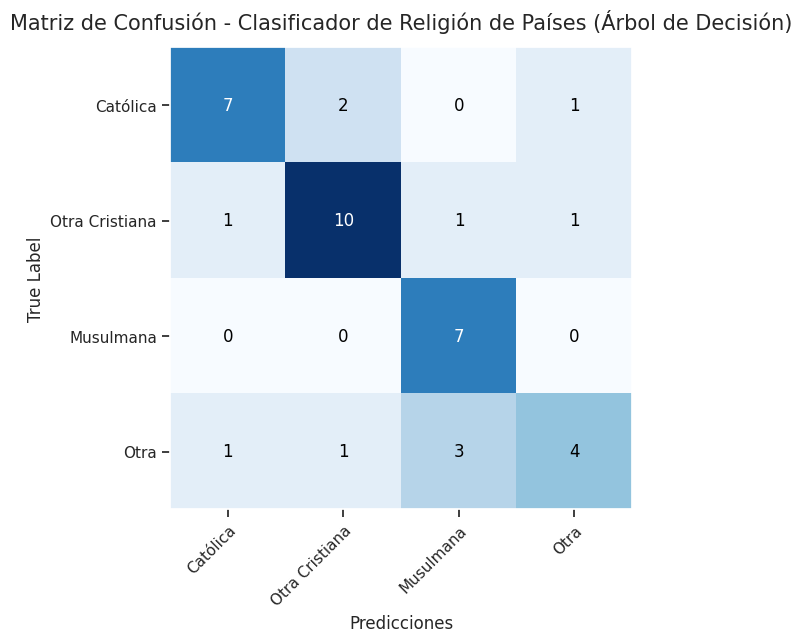

In [ ]:
# importar matriz de confusion
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# matriz de confusion
cm_Tree = confusion_matrix(y_test, predi_Tree)

# clases
class_names = ['Católica', 'Otra Cristiana', 'Musulmana', 'Otra']

# plot
plot_confusion_matrix(conf_mat=cm_Tree, figsize=(6, 6), class_names=class_names)

plt.xlabel('Predicciones')
plt.ylabel('True Label')

plt.title('Matriz de Confusión - Clasificador de Religión de Países (Árbol de Decisión)',
          pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Importancia de Predictores

In [ ]:
# importancia de predictores
tree_importance = model_Tree['decisiontreeclassifier'].feature_importances_

tree_importance

array([0.08480635, 0.07843983, 0.01169326, 0.00876994, 0.03709826,
       0.        , 0.01116175, 0.        , 0.01753989, 0.01812455,
       0.00876994, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01403191, 0.        , 0.02245637,
       0.02992918, 0.        , 0.        , 0.        , 0.02338652,
       0.01169326, 0.        , 0.        , 0.0353854 , 0.        ,
       0.17037203, 0.        , 0.30575927, 0.        , 0.01857165,
       0.        , 0.        , 0.00701596, 0.04532493, 0.01503419,
       0.00789295, 0.01674262, 0.        , 0.        , 0.        ])

In [ ]:
# columnas transformadas por el pipeline
df_x_train_Trans.columns

Index(['area', 'population', 'bars', 'stripes', 'colours', 'circles',
       'crosses', 'saltires', 'quarters', 'sunstars', 'mainhue_green',
       'mainhue_red', 'mainhue_blue', 'mainhue_gold', 'mainhue_white',
       'mainhue_orange', 'mainhue_black', 'topleft_black', 'topleft_red',
       'topleft_green', 'topleft_blue', 'topleft_white', 'topleft_orange',
       'botright_green', 'botright_red', 'botright_white', 'botright_black',
       'botright_blue', 'botright_gold', 'botright_orange', 'landmass', 'zone',
       'language', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'crescent', 'triangle', 'icon', 'animate', 'text'],
      dtype='object')

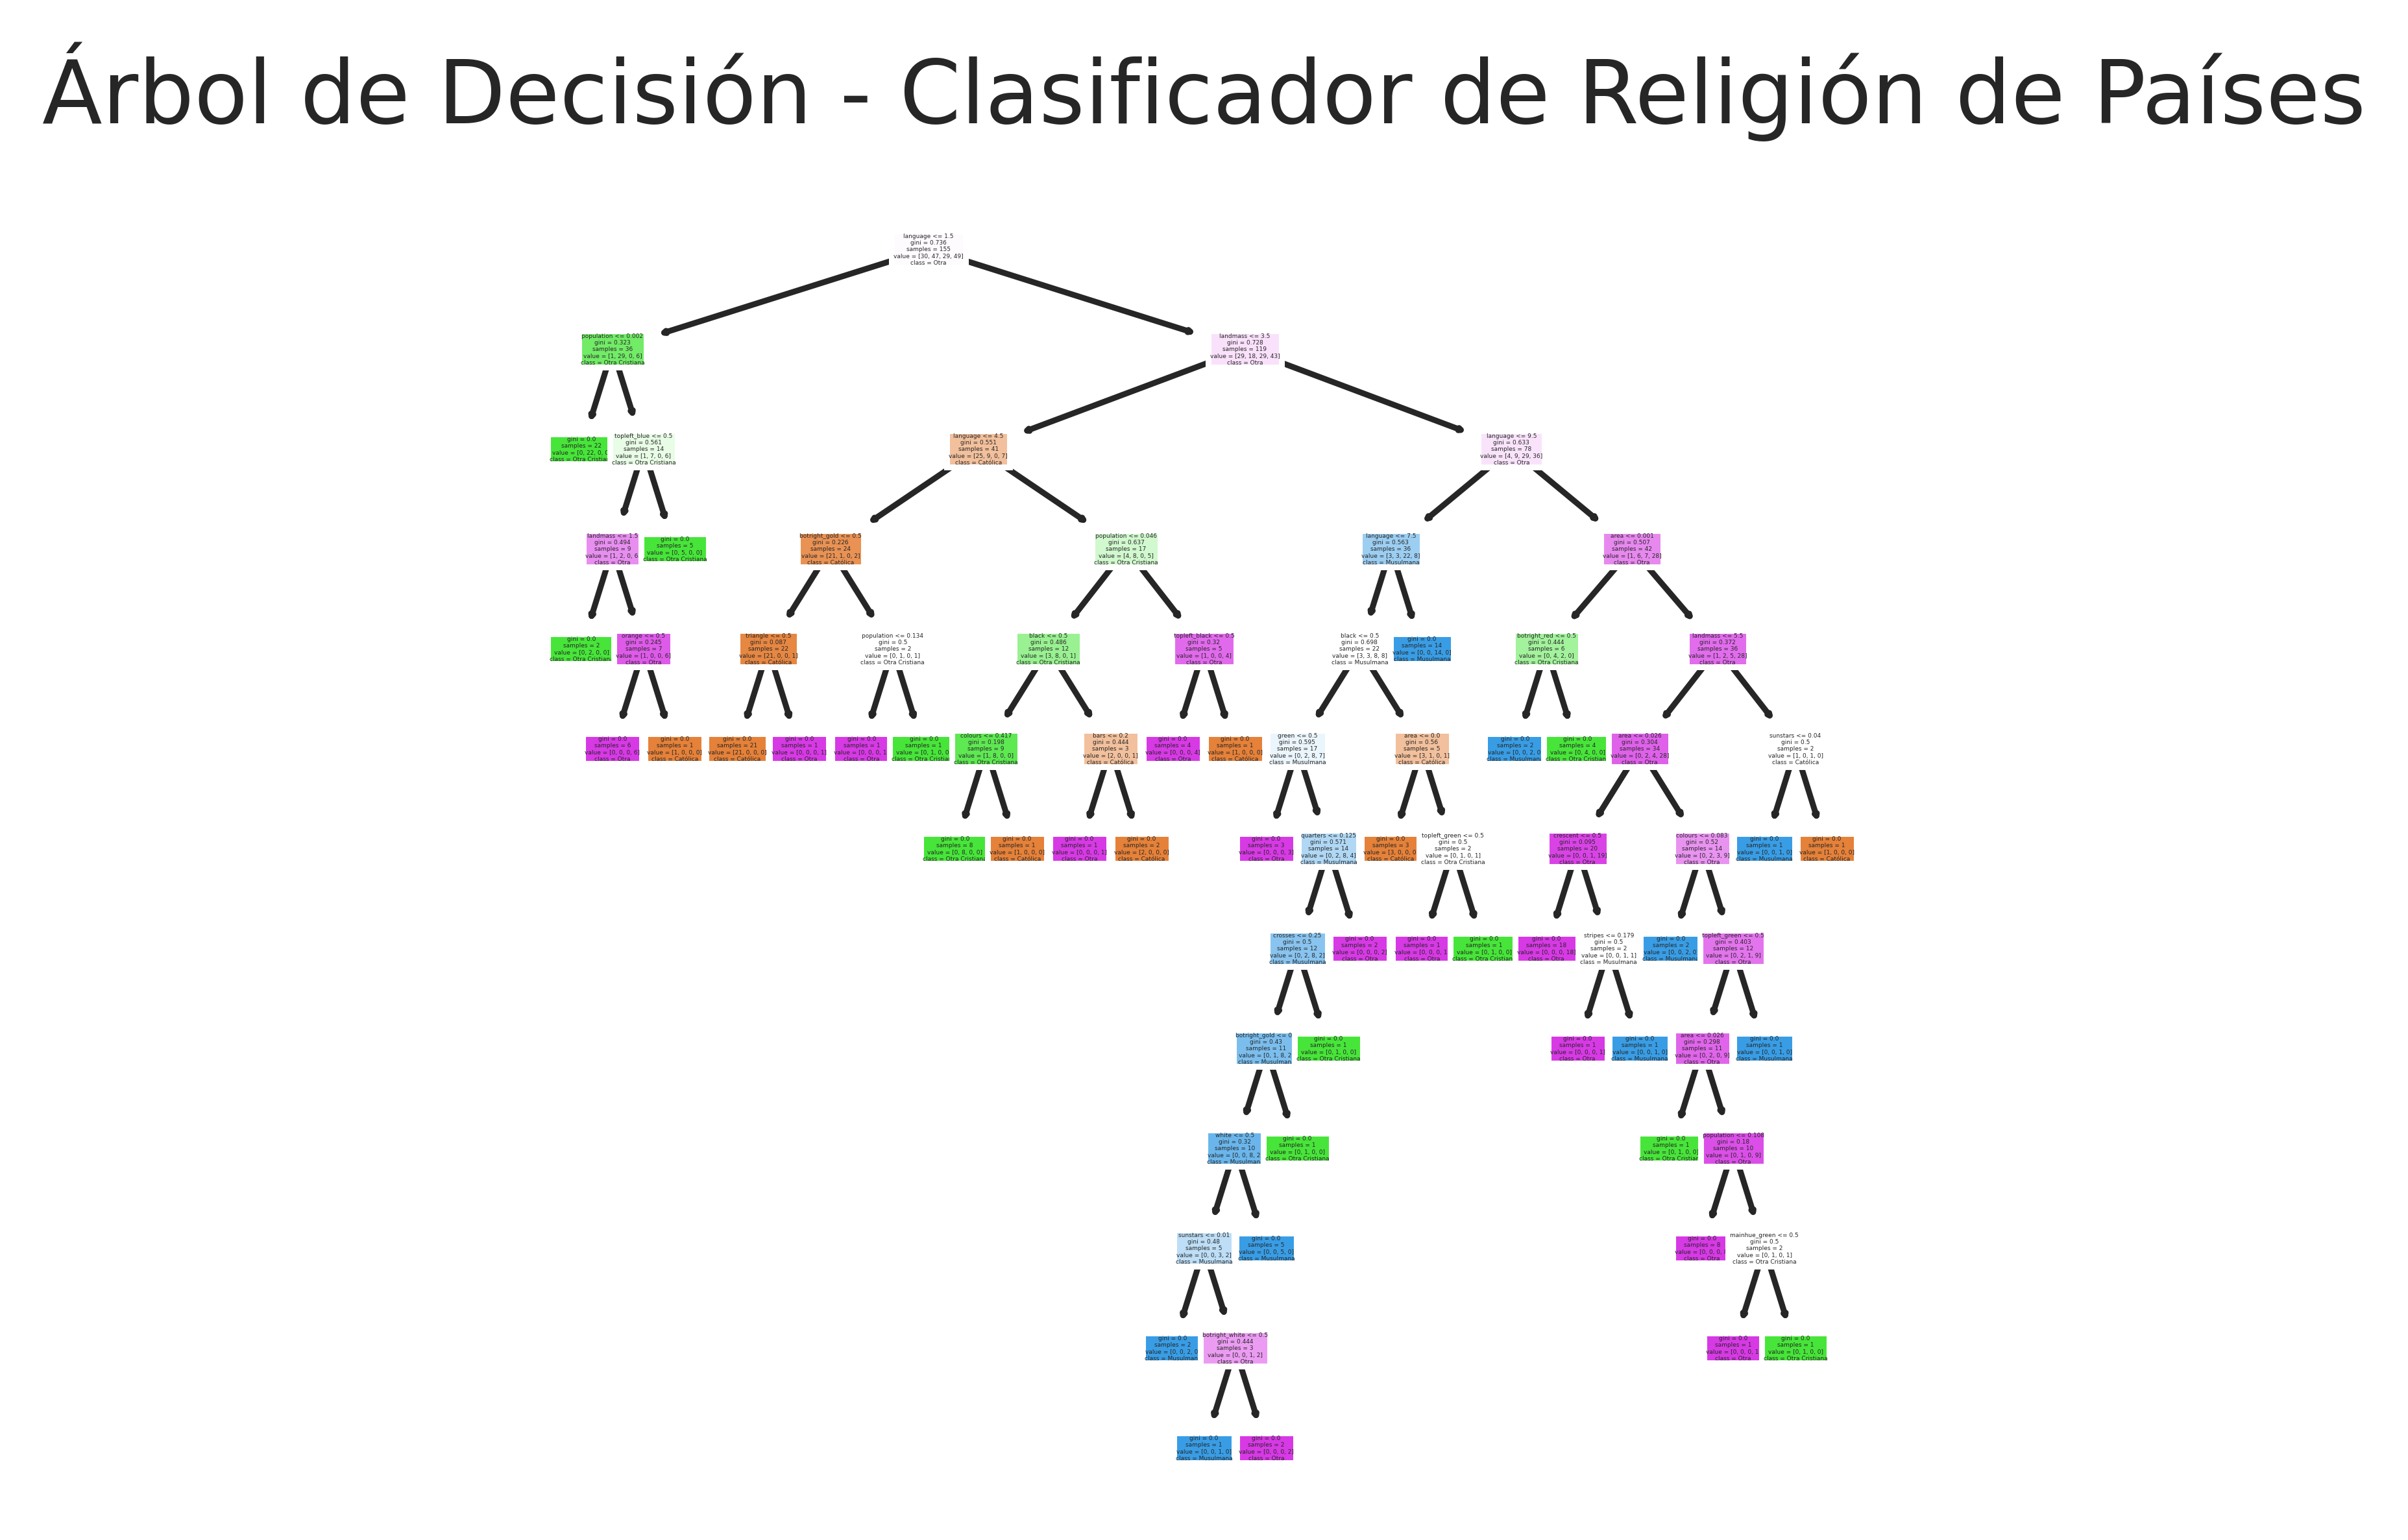

In [ ]:
# import tree
from sklearn import tree

# ver arbol
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=650)

# predictores
features = list(df_x_train_Trans)

# clases
clases = ['Católica', 'Otra Cristiana', 'Musulmana', 'Otra']

tree.plot_tree(model_Tree['decisiontreeclassifier'], feature_names=features,
               class_names=clases, filled=True)

plt.title('Árbol de Decisión - Clasificador de Religión de Países', pad=13, size=15)
plt.show()

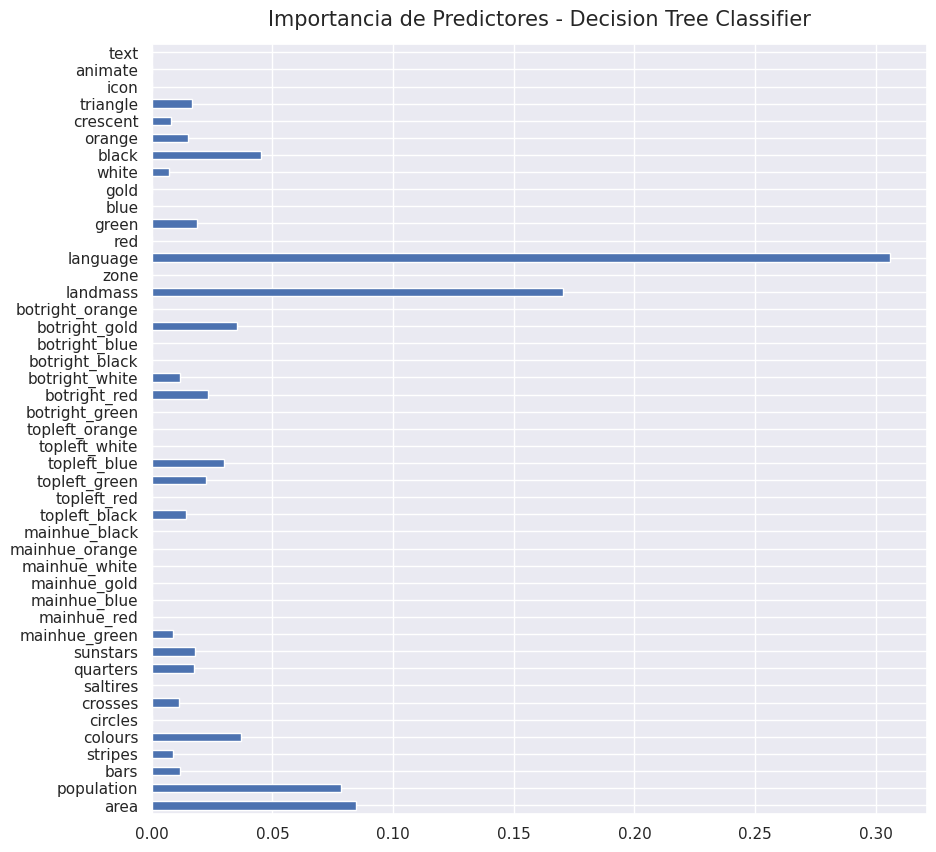

In [ ]:
# crear serie de importancia de predictores
predictor_importance = pd.Series(tree_importance, index=df_x_train_Trans.columns)

# plot importancia
fig, axs = plt.subplots(figsize=(10, 10))

predictor_importance.plot.barh()

plt.title('Importancia de Predictores - Decision Tree Classifier', pad=13, size=15)
plt.show()

- De acuerdo a la importancia de los predictores observada en el Árbol de Decisión se van a escoger los que se presentan a continuación para construir el ensamble de modelos:

  - Predictores Númericos:
    - area
    - population
    - bars
    - stripes
    - colours
    - crosses
    - quarters
    - sunstars

  - Predictores Categóricos que necesitan One Hot:
    - topleft
    - botright

  - Predictores Categóricos Dicotomizados:
    - landmass
    - language
    - green
    - white
    - black
    - orange
    - crescent
    - triangle


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### Workflow en Orange

- A continuación se presenta el Workflow realizado en Orange para el Clasificador de Religiones de Países

  <br>

  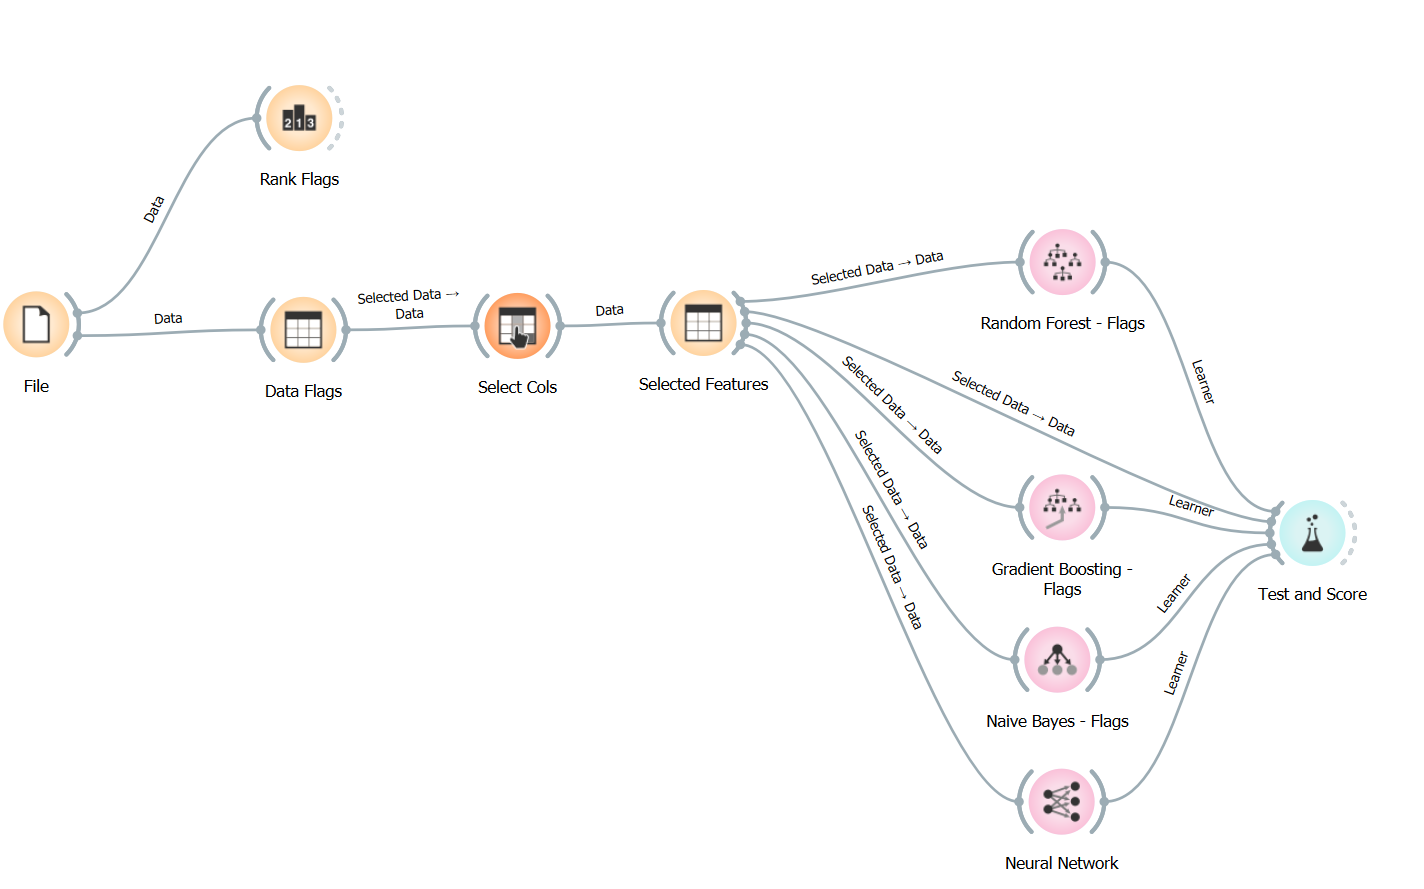

  <br>

  - Por medio de un Rank se seleccionaron los 10 predictores que generan una mayor Ganancia de Información y un mayor Gini

  <br>

  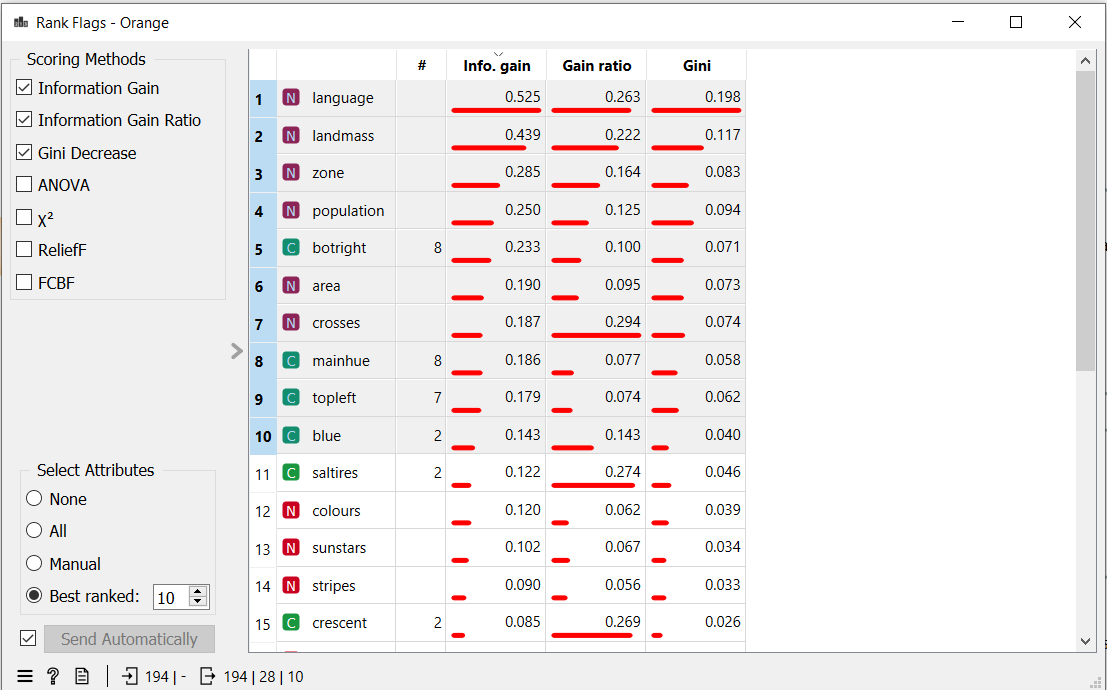

  <br>

  - Se probo un Random Forest, Gradient Boosting, Naive Bayes y una Red Neuronal y se obtuvo un desempeño muy similar al Árbol que se construyo en esta sección

  <br>

  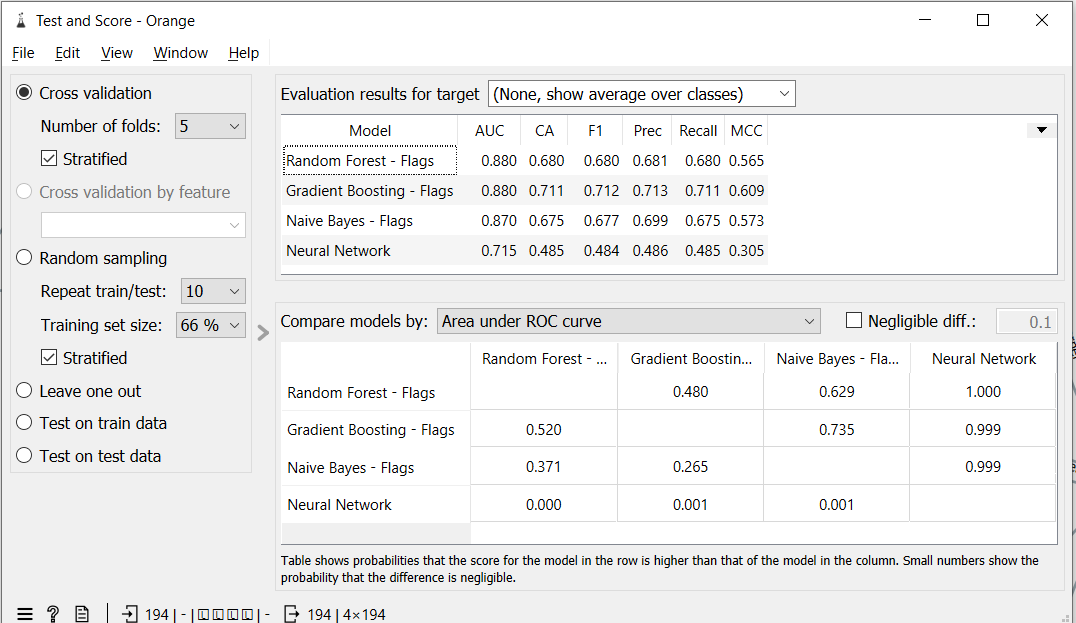

  <br>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Ensamble de Modelos

- Se va a crear un pipeline donde se van a poner a competir un Árbol de Decisión, un Random Forest y un XGBoost para determinar cual de estos modelos tiene un mejor desempeño en clasificar la religión de un país

In [ ]:
# columnas seleccionadas
cols_selected = ['area', 'population', 'bars', 'stripes', 'colours', 'crosses',
                 'quarters', 'sunstars', 'topleft', 'botright', 'landmass',
                 'language', 'green', 'white', 'black', 'orange', 'crescent', 'triangle']


# df con cols seleccionadas
df_selected = df_paises[cols_selected]

df_selected

,area,population,bars,stripes,colours,crosses,quarters,sunstars,topleft,botright,landmass,language,green,white,black,orange,crescent,triangle
0,648,16,0,3,5,0,0,1,black,green,5,10,1,1,1,0,0,0
1,29,3,0,0,3,0,0,1,red,red,3,6,0,0,1,0,0,0
2,2388,20,2,0,3,0,0,1,green,white,4,8,1,1,0,0,1,0
3,0,0,0,0,5,0,0,0,blue,red,6,1,0,1,0,1,0,1
4,0,0,3,0,3,0,0,0,blue,red,3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,0,0,0,3,0,1,5,blue,red,6,1,0,1,0,0,0,0
190,256,22,0,3,4,0,0,1,blue,red,3,6,0,1,0,0,0,0
191,905,28,0,0,4,0,0,0,green,green,4,10,1,0,0,1,0,0
192,753,6,3,0,4,0,0,0,green,brown,4,10,1,0,1,1,0,0


In [ ]:
# cols numericas
num_cols = ['area', 'population', 'bars', 'stripes', 'colours', 'crosses',
                'quarters', 'sunstars']

# cols categoric one hot
one_hot_cols = ['topleft', 'botright']

# cols categoric dicotimizadas
cate_cols_dico = ['landmass', 'language', 'green', 'white', 'black', 'orange',
                  'crescent', 'triangle']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Train Test Split

In [ ]:
# X
X = df_selected

# dimension de X y Y
print(f'X dimension: {X.shape}')
print(f'Y dimension: {Y.shape}')

X dimension: (194, 18)
Y dimension: (194,)


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Train Set dimension
print(f'x_train dimension: {x_train.shape}')
print(f'y_train dimension: {y_train.shape}', '\n')

# Test Set dimension
print(f'x_test dimension: {x_test.shape}')
print(f'y_test dimension: {y_test.shape}', '\n')

x_train dimension: (155, 18)
y_train dimension: (155,) 

x_test dimension: (39, 18)
y_test dimension: (39,) 



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Transformaciones y Pipeline de Procesamiento

In [ ]:
# num transformacion
num_trans = make_pipeline(MinMaxScaler(),
                          Winsorizer(capping_method='quantiles'))

num_trans

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('winsorizer',
                 Winsorizer(capping_method='quantiles', fold=0.05))])

In [ ]:
# one hot trans
hot_trans = make_pipeline(OneHot_feature(drop_last=True, ignore_format=True))

hot_trans

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop_last=True, ignore_format=True))])

In [ ]:
# preprocessor final
preprocess_f = ColumnTransformer(
    transformers=[('numeric', num_trans, num_cols),
                  ('one_hot', hot_trans, one_hot_cols)],
    remainder='passthrough'
)

preprocess_f

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('winsorizer',
                                                  Winsorizer(capping_method='quantiles',
                                                             fold=0.05))]),
                                 ['area', 'population', 'bars', 'stripes',
                                  'colours', 'crosses', 'quarters',
                                  'sunstars']),
                                ('one_hot',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop_last=True,
                                                                ignore_format=True))]),
                                 ['topleft', 'botright'])])

In [ ]:
# ver transformacion de x_train
x_train_trans_f = pd.DataFrame(preprocess_f.fit_transform(x_train))

x_train_trans_f.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.015293,0.040980,0.085161,0.104608,0.248817,0.054839,0.030645,0.018065,0.161290,0.251613,...,0.058065,0.045161,3.612903,5.374194,0.477419,0.741935,0.296774,0.129032,0.070968,0.161290
std,0.021609,0.059990,0.197318,0.128519,0.199866,0.156750,0.082255,0.029079,0.368991,0.435347,...,0.234623,0.208331,1.551652,3.593191,0.501109,0.438988,0.458317,0.336322,0.257603,0.368991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000469,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.005133,0.014599,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.020311,0.052920,0.000000,0.214286,0.333333,0.000000,0.000000,0.020000,0.000000,0.500000,...,0.000000,0.000000,5.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.076993,0.205474,0.600000,0.357143,0.716667,0.500000,0.250000,0.100000,1.000000,1.000000,...,1.000000,1.000000,6.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Pipeline de Modelos

In [ ]:
# instalar xgboost
!pip install xgboost

In [ ]:
# importar modulos
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model pipeline
pipeline_models = Pipeline(
    steps=[
        ('preprocessor', preprocess_f),
        ('modelo', DecisionTreeClassifier())
    ]
)

pipeline_models

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05))]),
                                                  ['area', 'population', 'bars',
                                                   'stripes', 'colours',
                                                   'crosses', 'quarters',
                                                   'sunstars']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop_last=True,
                                                                                 ignore_format=True))]),
                                                  ['topleft', 'botright'])])),
                ('modelo', DecisionTreeClassifier())])

In [ ]:
# parametros
params=[
    # Decision Tree Classifier
    {
        'modelo': [DecisionTreeClassifier()],
        'modelo__criterion': ['gini', 'entropy'],
        'modelo__random_state': [123]
    },
    # Random Forest
    {
        'modelo': [RandomForestClassifier()],
        'modelo__criterion': ['gini', 'entropy'],
        'modelo__n_estimators': [100, 125, 250]
    },
    # XGBoost
    {
        'modelo': [XGBClassifier()],
        'modelo__max_depth': [3, 5, 6],
        'modelo__eval_metric': ['merror', 'auc']
    }
]

params

[{'modelo': [DecisionTreeClassifier()],
  'modelo__criterion': ['gini', 'entropy'],
  'modelo__random_state': [123]},
 {'modelo': [RandomForestClassifier()],
  'modelo__criterion': ['gini', 'entropy'],
  'modelo__n_estimators': [100, 125, 250]},
 {'modelo': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Implementar GridSearchCV al Pipeline

In [ ]:
# importar GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# models grid
models_grid = GridSearchCV(estimator=pipeline_models, param_grid=params, cv=5,
                           scoring='f1_weighted')


In [ ]:
# train model
models_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler()),
                                                                                         ('winsorizer',
                                                                                          Winsorizer(capping_method='quantiles',
                                                                                                     fold=0.05))]),
                                                                         ['area',
                                                                          'population',
                                                                          'bars',
                                                                          'stripes',
                                                                          'colours',
                                                                          'crosses',
                                                                          'quarters',
                                                                          'sunstars']),
                                                                        ('one_hot',
                                                                         Pipeline(steps=[...
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=None,
                                                   max_leaves=None,
                                                   min_child_weight=None,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   n_estimators=100,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   predictor=None,
                                                   random_state=None, ...)],
                          'modelo__eval_metric': ['merror', 'auc'],
                          'modelo__max_depth': [3, 5, 6]}],
             scoring='f1_weighted')

In [ ]:
# mejor modelo
models_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05))]),
                                                  ['area', 'population', 'bars',
                                                   'stripes', 'colours',
                                                   'crosses', 'quarters',
                                                   'sunstars']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop_last=True,
                                                                                 ignore_format=True))]),
                                                  ['topleft', 'botright'])])),
                ('modelo', RandomForestClassifier(criterion='entropy'))])

- Como se puede ver el mejor modelo es un Random Forest con los hiperparámetros que se encuentran a continuación:

In [ ]:
# mejores hiperparametros del modelo
models_grid.best_params_

{'modelo': RandomForestClassifier(criterion='entropy'),
 'modelo__criterion': 'entropy',
 'modelo__n_estimators': 100}

In [ ]:
# score mejor modelo >> f1 weighted
models_grid.score(x_test, y_test)

0.8196078431372549

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Performance del Mejor Modelo

In [ ]:
# guardar modelo
best_model = models_grid.best_estimator_

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05))]),
                                                  ['area', 'population', 'bars',
                                                   'stripes', 'colours',
                                                   'crosses', 'quarters',
                                                   'sunstars']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop_last=True,
                                                                                 ignore_format=True))]),
                                                  ['topleft', 'botright'])])),
                ('modelo', RandomForestClassifier(criterion='entropy'))])

In [ ]:
# predicciones
predi_f = best_model.predict(x_test)

predi_f

array([0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 3, 1, 2, 2, 1, 0, 3, 2, 1, 3, 0,
       3, 0, 1, 1, 1, 0, 3, 2, 0, 3, 0, 1, 2, 2, 1, 1, 0])

In [ ]:
# imprimir classification report
print('Classification Report - Mejor Clasificador de Religión de Países (Random Forest):', '\n')
print(classification_report(y_test, predi_f))

Classification Report - Mejor Clasificador de Religión de Países (Random Forest): 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.85      0.85      0.85        13
           2       0.70      1.00      0.82         7
           3       1.00      0.67      0.80         9

    accuracy                           0.82        39
   macro avg       0.84      0.83      0.82        39
weighted avg       0.84      0.82      0.82        39



- Como podemos observar, el mejor Clasificador, después de haber seleccionado los predictores más importantes, es un Random Forest.

  - Este modelo obtuvo la mejor metrica F1 en datos nuevos frente a un XGBoost y a un Árbol de Decisión

  - Del mimo modo, mejoro las métricas de clasificación que habian sido obtenidas por el Árbol de Decisión cuando se estaban obteniendo los predictores más importantes

  - A continuación se muestran las métricas del mejor modelo obtenido  

    - Accuracy Promedio ⟶ 0.82
    - F1-Score Promedio ⟶ 0.82
    - Precision Promedio ⟶ 0.84
    - Recall Promedio ⟶ 0.82

  <br>

  - El Recall mas bajo ahora es de solo 0.67 y corresponde a la categoria *Otra Religión*
    - El modelo tiene una tendencia a No clasificar a paises en la categoria *Otra Religión* cuando lo son

  - La Precision mas baja ahora es de solo 0.70 y corresponde a la categoria *Musulmana*
    - El modelo tiene una tendencia a Clasificar a países en la categoria *Musulmana* cuando No lo son

  <br>

  - A continuación se muestra la Matriz de Confusión del Mejor Modelo obtenido

  <br>


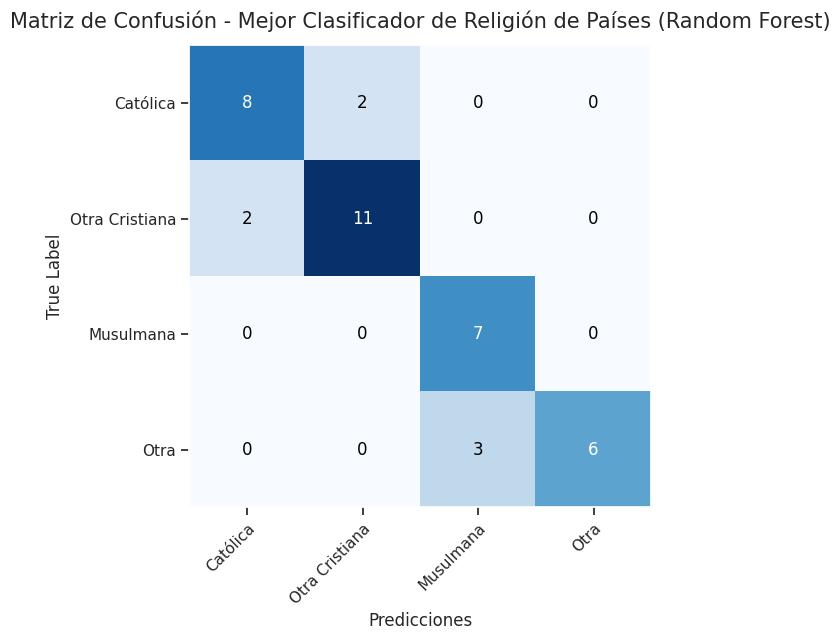

In [ ]:
# matriz de confusion
cm_f = confusion_matrix(y_test, predi_f)

# clases
class_names = ['Católica', 'Otra Cristiana', 'Musulmana', 'Otra']

# plot
plot_confusion_matrix(conf_mat=cm_f, figsize=(6, 6), class_names=class_names)

plt.xlabel('Predicciones')
plt.ylabel('True Label')

plt.title('Matriz de Confusión - Mejor Clasificador de Religión de Países (Random Forest)',
          pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)